# Battery Consumption Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [128]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [129]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'
mpl.rcParams['figure.figsize'] = (7,5)

## Helper Functions

In [130]:
def get_merged_data(current_df, label_df):
    
    # Convert the timestamps to datetime objects
    current_df_copy = current_df.copy()
    label_df_copy = label_df.copy()

    current_df_copy['Time'] = pd.to_datetime(current_df_copy['Time'], format='%H:%M:%S.%f').dt.time
    label_df_copy['Timestamps'] = pd.to_datetime(label_df_copy['Timestamps'], format='%H:%M:%S.%f').dt.time

    # Remove the decimal point from timestamps
    current_df_copy['Time'] = current_df_copy['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
    label_df_copy['Timestamps'] = label_df_copy['Timestamps'].apply(lambda x: x.strftime('%H:%M:%S'))

    # Merge the dataframes based on the timestamp column
    merged_data = pd.merge(current_df_copy, label_df_copy, left_on='Time', right_on='Timestamps', how='left')
    merged_data.drop(['Timestamps'], axis=1, inplace=True)
    return merged_data

In [131]:
def plot_data(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)
    plt.show()

In [132]:
def plot_data_markers(data):
    t = np.arange(len(data['Current (mA)']))

    # Plot the data
    plt.figure()
    plt.plot(t, data['Current (mA)'])
    plt.xlabel('Index')
    plt.ylabel('Current (mA)')
    plt.title('Current Measurement')
    plt.grid(True)

    for index, row in data.iterrows():
        if not pd.isna(row['Labels']):
            print(index)
            plt.axvline(x=index, color='r', linestyle='--')

    plt.show()

## Car Park Sensor

In [133]:
# current_cps_df = pd.read_csv('./cps/cps_data.csv')
# label_cps_df = pd.read_csv('./cps/timestamps.csv')

## Air Quality Monitoring System

In [134]:
current_aqms_df = pd.read_csv('./aqms/aqms_data.csv')
label_aqms_df = pd.read_csv('./aqms/timestamps.csv')

In [135]:
aqms_merged_df = get_merged_data(current_aqms_df, label_aqms_df)

aqms_merged_df

,Time,Current (mA),Labels
0,17:20:17,25.5,NaN
1,17:20:18,25.8,NaN
2,17:20:19,25.6,NaN
3,17:20:20,25.6,NaN
4,17:20:21,25.6,NaN
...,...,...,...
3898,18:26:56,36.1,NaN
3899,18:26:57,35.2,NaN
3900,18:26:58,46.4,NaN
3901,18:26:59,45.1,NaN


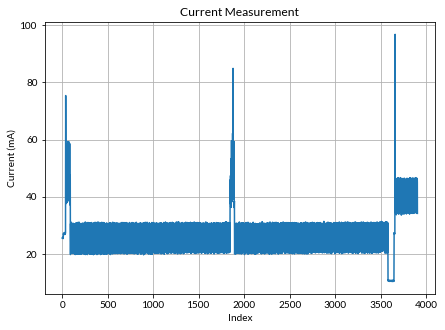

In [136]:
plot_data(aqms_merged_df)

11
36
37
47
83
84
1848
1853
1854
1864
1885
1887
3649
3655
3656


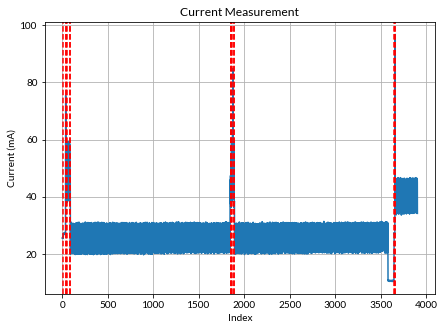

In [137]:
plot_data_markers(aqms_merged_df)

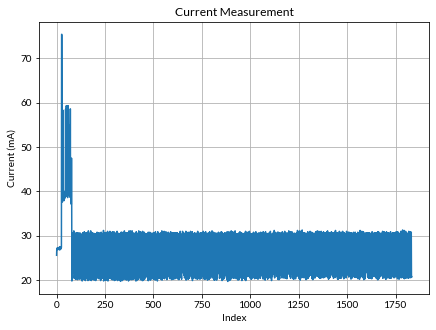

In [138]:
aqms_cycle_df = aqms_merged_df.drop(aqms_merged_df.index[1843:], axis=0)
aqms_cycle_df = aqms_cycle_df.drop(aqms_cycle_df.index[0:10], axis=0)
plot_data(aqms_cycle_df)

11
36
37
47
83
84


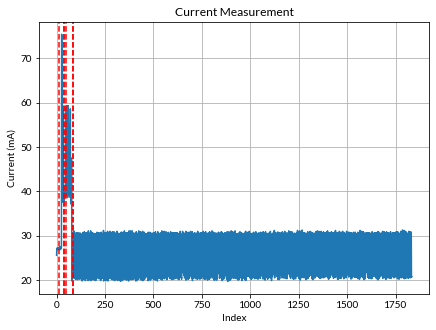

In [139]:
plot_data_markers(aqms_cycle_df)

## Fire Detection System

In [140]:
current_fds_df = pd.read_csv('./fds/fds_data.csv')
label_fds_df = pd.read_csv('./fds/timestamps.csv')